In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
df=pd.read_csv('student_clustering.csv')
# link to dataset 
# "https://github.com/campusx-official/100-days-of-machine-learning/blob/main/kmeans/student_clustering.csv"

In [4]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [5]:
df.shape

(200, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    200 non-null    float64
 1   iq      200 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


In [7]:
df.isnull().sum()

cgpa    0
iq      0
dtype: int64

In [8]:
df.duplicated().sum()

7

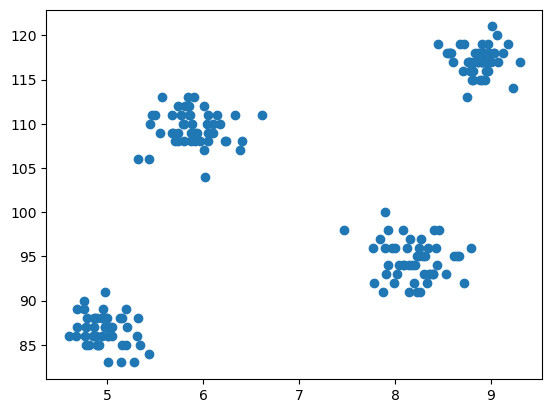

In [9]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

# USING SKLEARN

In [10]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,21):
    km=KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)
    

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [11]:
wcss

[29957.898288,
 4184.14127,
 2503.397581,
 681.96966,
 514.1616803171115,
 388.8524026875981,
 303.53129837048664,
 293.17121772689006,
 231.7728846028976,
 202.56514940102312,
 171.9382809180609,
 155.5983839688053,
 121.76544938471766,
 119.49694294831978,
 83.11536194686568,
 78.23055951674144,
 75.84698588934347,
 61.81376669191919,
 60.06198187452985,
 51.76574247627372]

# ELBOW METHOD
![image](elbow.png)

(1.0, 10.0)

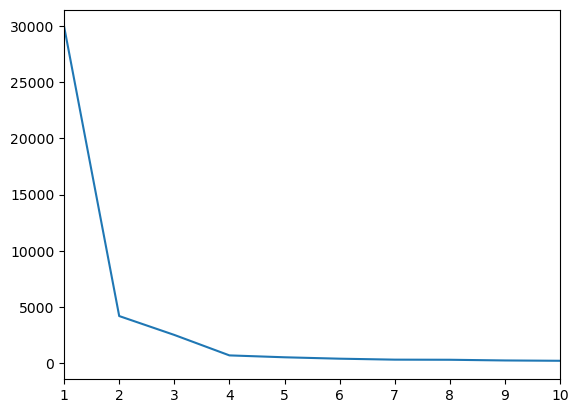

In [12]:
plt.plot(range(1,21),wcss)
plt.xlim(1,10)

In [13]:
X=df.iloc[:,:].values
km=KMeans(n_clusters=4)
y_means=km.fit_predict(X)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
y_means

array([0, 1, 3, 3, 1, 1, 3, 2, 1, 3, 0, 1, 3, 0, 1, 3, 1, 3, 1, 1, 3, 0,
       3, 0, 0, 3, 0, 2, 3, 1, 2, 1, 2, 1, 3, 3, 2, 1, 0, 1, 0, 3, 3, 0,
       2, 2, 3, 1, 2, 1, 0, 0, 2, 3, 2, 1, 1, 2, 1, 2, 1, 3, 3, 2, 0, 2,
       3, 0, 1, 3, 1, 2, 3, 0, 1, 2, 1, 2, 0, 3, 3, 2, 1, 0, 2, 0, 2, 1,
       2, 1, 2, 2, 3, 0, 3, 3, 2, 3, 0, 2, 1, 0, 0, 2, 0, 0, 3, 0, 2, 2,
       3, 2, 1, 1, 3, 2, 3, 1, 2, 0, 0, 1, 3, 2, 3, 0, 3, 1, 0, 3, 3, 1,
       0, 0, 1, 2, 1, 0, 3, 3, 3, 0, 1, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2,
       0, 3, 1, 2, 1, 3, 0, 2, 1, 3, 2, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 3,
       2, 1, 0, 2, 2, 1, 1, 1, 3, 0, 3, 3, 2, 1, 3, 3, 0, 0, 3, 0, 2, 1,
       1, 2])

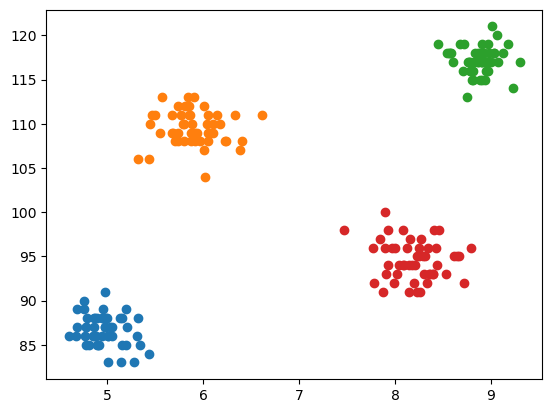

In [15]:
plt.scatter(X[y_means==0,0],X[y_means==0,1])
plt.scatter(X[y_means==1,0],X[y_means==1,1])
plt.scatter(X[y_means==2,0],X[y_means==2,1])
plt.scatter(X[y_means==3,0],X[y_means==3,1])



# FROM SCRATCH

In [16]:
from sklearn.datasets import make_blobs
centroid=[(-5,-5),(5,5)]
std=[1,1]
X,y=make_blobs(n_samples=100,cluster_std=std,centers=centroid,n_features=2,random_state=2)

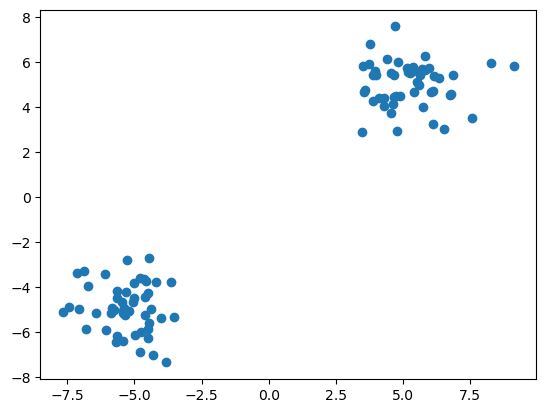

In [17]:
plt.scatter(X[:,0],X[:,1])

In [38]:
import random
class myKmeans():
                       
    def __init__(self,n_clusters=2,max_iters=2):
        self.n_clusters=n_clusters
        self.max_iters=max_iters
        self.inertia_=None
        self.centroids=None
        
    
        
    def fit_pedict(self,X_train):
        rand_index=random.sample(range(0,X_train.shape[0]),self.n_clusters)
        
        self.centroids=X_train[rand_index]
        
        for i in range(self.max_iters):
            cluster_group=self.assign_cluster(X_train)
            old_centroids=self.centroids
            self.centroids=self.move_centroids(X_train,cluster_group)
            
            if (old_centroids==self.centroids).all():
                break
        self.inertia_=np.sum([np.sum((X_train[cluster_group==i]-self.centroids[i])**2) for i in range(self.n_clusters)])
        return cluster_group,self.inertia_
            
    def assign_cluster(self,X_train):
        
        cluster_group=[]
       
        
        for row in X_train:
            min_distance=float('inf')
            min_centroid=None
            
            for i in  range(len(self.centroids)):
                dis=np.sqrt(np.sum((row-self.centroids[i])**2))
                if(dis<min_distance):
                    min_distance=dis
                    min_centroid=i
            cluster_group.append(min_centroid)
        return np.array(cluster_group)
                
                
            
    def move_centroids(self,X_train,cluster_group):
        new_centroids=[]
        cluster_type=np.unique(cluster_group)
        for ctype in cluster_type:
             new_centroids.append(X_train[cluster_group==ctype].mean(axis=0))
        return np.array(new_centroids)
        
        
        
        
        

In [39]:
mkm=myKmeans(n_clusters=4,max_iters=100)
pred,inertia=mkm.fit_pedict(X)

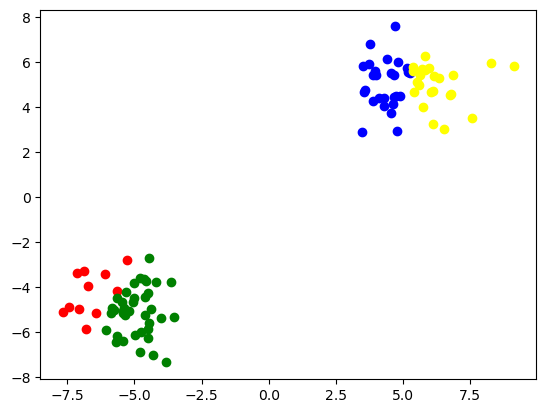

In [40]:
plt.scatter(X[pred==0,0],X[pred==0,1],color="red")
plt.scatter(X[pred==1,0],X[pred==1,1],color="blue")
plt.scatter(X[pred==2,0],X[pred==2,1],color="green")
plt.scatter(X[pred==3,0],X[pred==3,1],color="yellow")

In [42]:
inertias=[]
for i in range(1,21):
    mkm=myKmeans(n_clusters=i)
    _,inertia=mkm.fit_pedict(X)
    inertias.append(inertia)

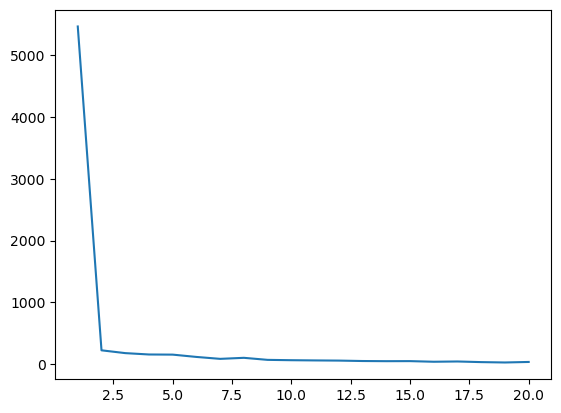

In [43]:
plt.plot(range(1,21),inertias)

In [45]:
skm=KMeans(n_clusters=4)
sk_pred=skm.fit_predict(X)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


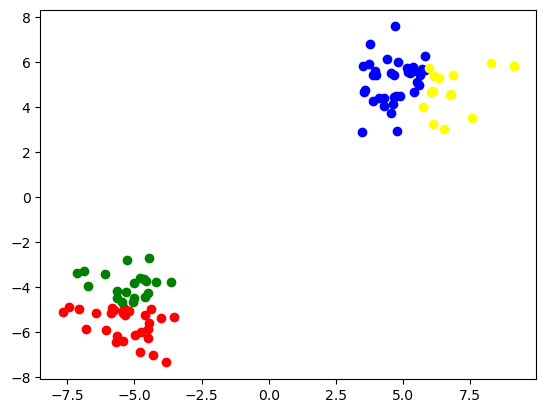

In [46]:
plt.scatter(X[sk_pred==0,0],X[sk_pred==0,1],color="red")
plt.scatter(X[sk_pred==1,0],X[sk_pred==1,1],color="blue")
plt.scatter(X[sk_pred==2,0],X[sk_pred==2,1],color="green")
plt.scatter(X[sk_pred==3,0],X[sk_pred==3,1],color="yellow")

In [47]:
skm.inertia_

142.53668744108495